In [1]:
import numpy as np
import matplotlib.pyplot as plt
area = [2.4,3.5,2.8,3.9,6.4,5.8,5.1,6.2,6.5,6.9,7.2,3.3,4.9,5.2,5.5]
price= [190,390,320,360,590,560,540,730,640,620,680,280,450,470,560]

239993.0466666666


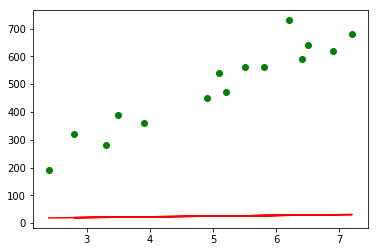

122582.73437406535


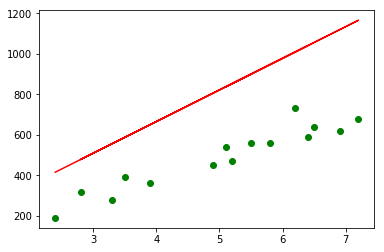

63166.35188866967


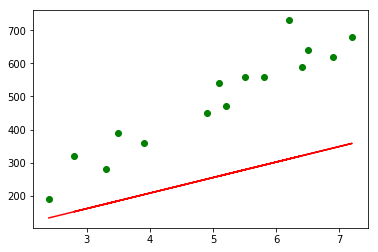

33098.09694771774


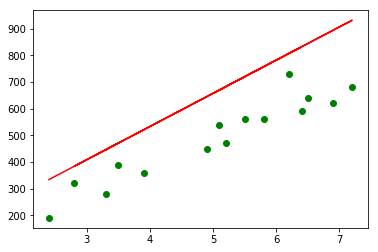

17881.61475820864


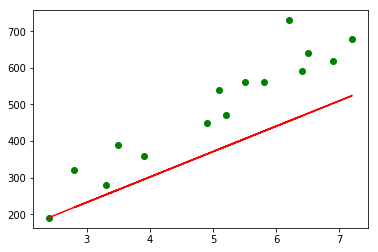

10180.950798646161


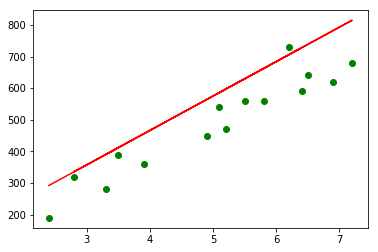

6283.707733022633


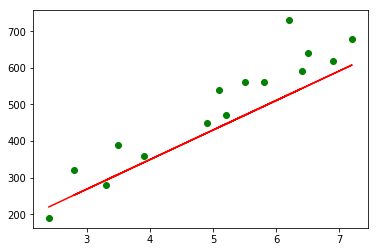

4311.207874991661


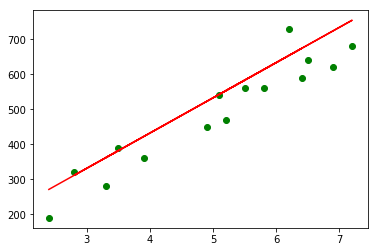

3312.736747237355


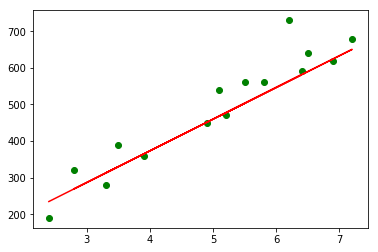

2807.180401440969


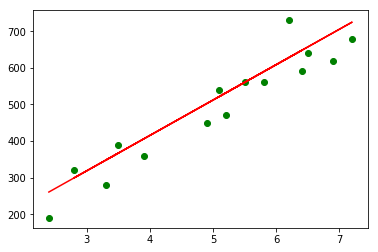

89.55310569469123 27.197915087258828


In [2]:
x = np.array(area)
y = np.array(price)
m = 2.5
c = 12.6
LR = 0.002
for i in range(10):
    # get prediction
    yhat = m*x + c
    
    # calculate error
    error = np.mean((y-yhat)**2)
    
    # Apply Gradient Descent
    dedm = 2*np.dot((yhat-y),x)
    m = m - LR*dedm
    
    dedc = 2*np.dot((yhat-y),np.ones(y.size))
    c = c - LR*dedc
    
    print(error)
    
    plt.scatter(x,y,c='g')
    plt.plot(x,yhat,c='r')
    plt.show()
print(m,c)

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x = np.array(area).reshape(len(area),1)
y = np.array(price)

In [4]:
model.fit(x,y)
print(model.coef_,model.intercept_)

[97.54973314] 0.3493449781659024


In [5]:
model.predict([[15.5]])

array([1512.37020864])

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_excel(r"D:\projects\machine learning\DataScience\Dataset\Folds5x2_pp.xlsx")
df.shape

(9568, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [9]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


# Data Cleaning

In [10]:
df.duplicated().sum()

41

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()#there are no null values or empty cells

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [14]:
df.skew()#no skewness present in data

AT   -0.136107
V     0.196819
AP    0.273846
RH   -0.435138
PE    0.305791
dtype: float64

# Feature Engineering

### 1.correlation Analysis

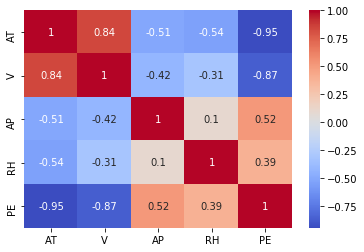

In [15]:
cor = df.corr()
plt.figure(figsize=(6,4))
sns.heatmap(cor,annot=True,cmap="coolwarm")
plt.show()

### 2.ANOVA

In [16]:
xd = df[['AT','V','AP','RH']]
yd = df[['PE']]
from sklearn.feature_selection import f_regression
fscore,pvalue = f_regression(xd,yd)
for i in range(4):
    print(xd.columns[i],pvalue[i])

AT 0.0
V 0.0
AP 0.0
RH 0.0


d:\anaconda\envs\home\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Preprocessing

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(xd,yd,test_size=0.2,random_state=5)


In [18]:
print(xd.shape)
print(xtrain.shape)
print(xtest.shape)

(9527, 4)
(7621, 4)
(1906, 4)


# ML Algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Performance Analysis

array([[444.9563843]])

##### accuracy can be measured using r square score

0.9302847464353333

0.9301380546866439


# Exporting Model

['cpp_model.pkl']